In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
%matplotlib inline
#tambahkan library sesuai kebutuhan

In [2]:
data = pd.read_csv('activity_km_07_01.csv')
data

,PH,cahaya,intensitas air,suhu,PPM,tinggi air,aksi
0,6.5,Ada,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,Ada,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,Ada,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,Ada,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa
...,...,...,...,...,...,...,...
611,4.6,Ada,Rendah sekali,25.3,904.0,47,Hidupkan Lampu
612,2.1,Ada,Rendah sekali,25.0,388.0,18,Hidupkan Lampu dan Pompa nutrisi TDS
613,3.2,Ada,Rendah sekali,25.3,793.0,19,Hidupkan Lampu
614,1.4,Ada,Rendah sekali,25.4,1052.0,3,Hidupkan Lampu


## 1. Mengganti nama kolom yang menggunakan spasi

In [3]:
data = data.rename(columns={'PH': 'pH', 'cahaya': 'cahaya', 'intensitas air': 'intensitas_air', 'suhu':'suhu','PPM':'PPM','tinggi air':'tinggi_air','aksi':'aksi'})

## 2. Mengganti data kategorikal menjadi bentuk numerical (Clue : Labelencoder tidak bekerja ketika ada missing value, gunakan metode lain)

In [4]:
def getNumber(str):
    if str=="Ada":
        return 1
    elif str=="Tidak ada":
        return 0
    else:
        return str
data["cahaya"]=data["cahaya"].apply(getNumber)

data.head()

,pH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,1.0,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,1.0,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,1.0,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,1.0,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa


In [5]:
def getNumber(str):
    if str=="Tinggi":
        return 3
    elif str=="Cukup":
        return 2
    elif str=="Rendah":
        return 1
    elif str=="Rendah sekali":
        return 0
    else:
        return str
data["intensitas_air"]=data["intensitas_air"].apply(getNumber)

data.head()

,pH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,1.0,3,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,1.0,3,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,1.0,3,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,1.0,3,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,3,27.1,602.0,444,Tidak melakukan apa-apa


In [18]:
def getNumber(str):
    if str=="Hidupkan Lampu dan Pompa nutrisi TDS":
        return 3
    elif str=="Hidupkan Lampu":
        return 2
    elif str=="Hidupkan Pompa nutrisi TDS":
        return 1
    elif str=="Tidak melakukan apa-apa":
        return 0
    else:
        return str
        
data["aksi"]=data["aksi"].apply(getNumber)

data.head()

,pH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,1.000000,3,27.0,188.0,622.00,3
1,5.7,1.000000,3,26.9,79.0,557.00,3
2,6.0,1.000000,3,27.0,11.0,491.00,3
3,6.5,1.000000,3,27.1,345.0,998.75,0
4,6.2,0.511864,3,27.1,602.0,444.00,0


## 3. Handle Missing Value

In [6]:
#Cek missing value
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().sum()/891)*100})
missing_data

,total_missing,perc_missing
pH,16,1.795735
cahaya,26,2.918070
intensitas_air,0,0.000000
suhu,27,3.030303
PPM,5,0.561167
tinggi_air,0,0.000000
aksi,0,0.000000


In [7]:
#mengelompokkan missing value
column_missing = ['pH', 'cahaya', 'suhu', 'PPM']
column_missing

['pH', 'cahaya', 'suhu', 'PPM']

In [8]:
#solve missing value
for col in column_missing:
  data[col].replace(np.nan, data[col].mean(), inplace=True)

data.isnull().sum()

pH                0
cahaya            0
intensitas_air    0
suhu              0
PPM               0
tinggi_air        0
aksi              0
dtype: int64

## 4. Detect outliers dan handling (bisa dihapus atau diganti nilainya dengan mean/modus/median)

In [9]:
data.columns

Index(['pH', 'cahaya', 'intensitas_air', 'suhu', 'PPM', 'tinggi_air', 'aksi'], dtype='object')

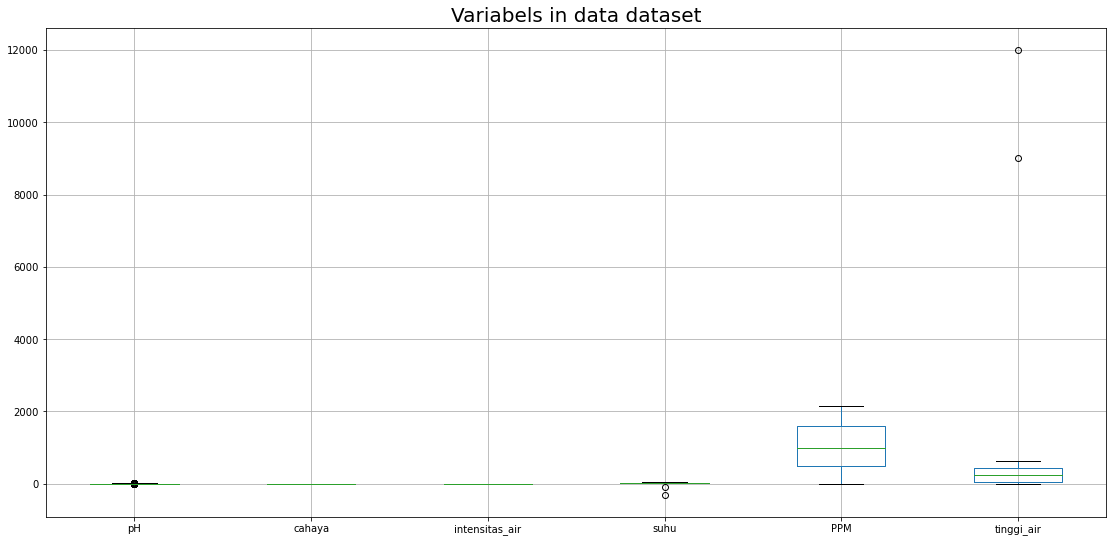

In [10]:
num_cols = ['pH', 'cahaya', 'intensitas_air', 'suhu', 'PPM', 'tinggi_air', 'aksi']
plt.figure(figsize=(19,9))
data[num_cols].boxplot()
plt.title("Variabels in data dataset", fontsize=20)
plt.show()

In [ ]:
#terlihat bahwa kolom yang mempunyai outliers adalah tinggi_air dan suhu

In [11]:
#replace outliers suhu
Q1 = data['suhu'].quantile(0.25)
Q3 = data['suhu'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['suhu']=np.where(data['suhu']>upper_whisker,upper_whisker,np.where(data['suhu']<lower_whisker,lower_whisker,data['suhu']))

In [12]:
#replace outliers tinggi_air
Q1 = data['tinggi_air'].quantile(0.25)
Q3 = data['tinggi_air'].quantile(0.75)
IQR = Q3 - Q1

whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['tinggi_air']=np.where(data['tinggi_air']>upper_whisker,upper_whisker,np.where(data['tinggi_air']<lower_whisker,lower_whisker,data['tinggi_air']))

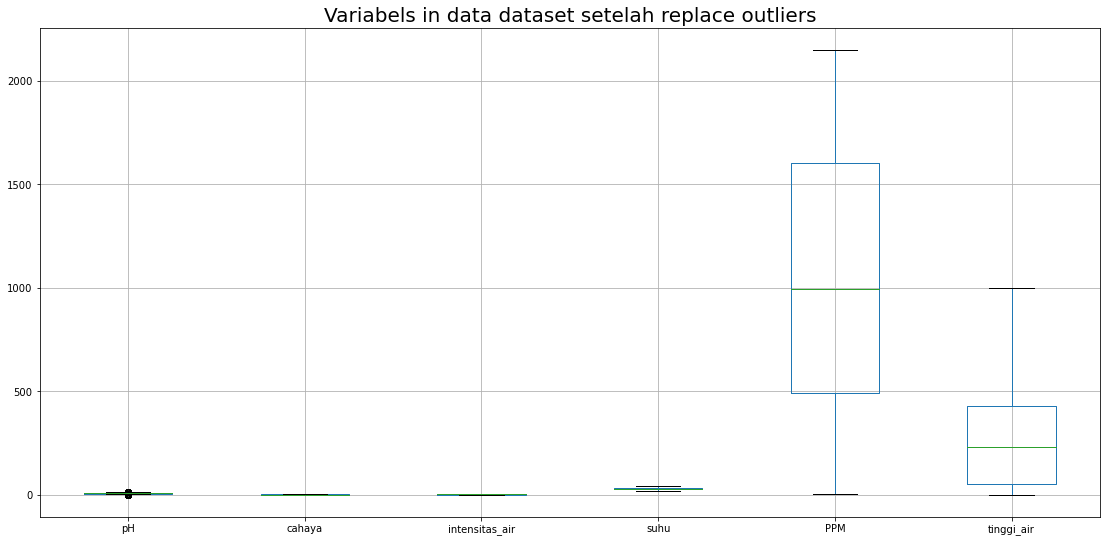

In [13]:
#setelah direplace outliers nya
num_cols = ['pH', 'cahaya', 'intensitas_air', 'suhu', 'PPM', 'tinggi_air', 'aksi']
plt.figure(figsize=(19,9))
data[num_cols].boxplot()
plt.title("Variabels in data dataset setelah replace outliers", fontsize=20)
plt.show()

## 5. Pisahkan data feature dengan label

In [240]:
X = data.iloc[:,:6].values
X

array([[6.500e+00, 1.000e+00, 3.000e+00, 2.700e+01, 1.880e+02, 6.220e+02],
       [5.700e+00, 1.000e+00, 3.000e+00, 2.690e+01, 7.900e+01, 5.570e+02],
       [6.000e+00, 1.000e+00, 3.000e+00, 2.700e+01, 1.100e+01, 4.910e+02],
       ...,
       [3.200e+00, 1.000e+00, 0.000e+00, 2.530e+01, 7.930e+02, 1.900e+01],
       [1.400e+00, 1.000e+00, 0.000e+00, 2.540e+01, 1.052e+03, 3.000e+00],
       [5.000e+00, 1.000e+00, 0.000e+00, 2.530e+01, 9.770e+02, 1.900e+01]])

In [242]:
Y = data.iloc[:, 6].values
Y

array([3, 3, 3, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 3, 3, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 3, 0, 3, 3, 3,

## 6. Check Imbalanced Dataset, jika imbalanced, gunakan smote

In [20]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
from collections import Counter
counter = Counter(Y)
print(counter)

Counter({0: 473, 2: 92, 3: 39, 1: 12})


In [23]:
oversample = SMOTE(k_neighbors=5)
X_smote, Y_smote = oversample.fit_resample(X, Y)

In [24]:
counter = Counter(Y_smote)
print(counter)

Counter({3: 473, 0: 473, 2: 473, 1: 473})


## 7. Visualisasikan Data sehingga kita bisa mengetahui sebuah informasi

In [25]:
import seaborn as sns

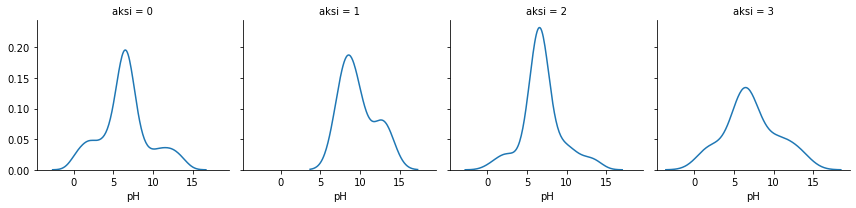

In [26]:
g = sns.FacetGrid(data, col='aksi')
g = g.map(sns.kdeplot, 'pH')


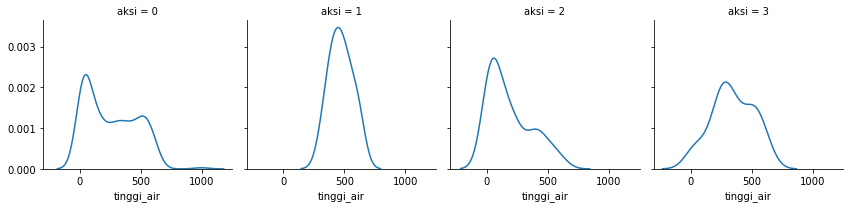

In [27]:
g = sns.FacetGrid(data, col='aksi')
g = g.map(sns.kdeplot, 'tinggi_air')


## 8. Lakukan Normalization menggunakan MinMaxScaler atau Standardization menggunakan StandarScaler

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler =  MinMaxScaler()

# transform data
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[0.46428571 1.         1.         0.38738739 0.08705773 0.62277847]
 [0.40714286 1.         1.         0.38288288 0.03631285 0.55769712]
 [0.42857143 1.         1.         0.38738739 0.00465549 0.49161452]
 ...
 [0.22857143 1.         0.         0.31081081 0.36871508 0.01902378]
 [0.1        1.         0.         0.31531532 0.48929236 0.00300375]
 [0.35714286 1.         0.         0.31081081 0.45437616 0.01902378]]


## 10. Membuat Model ANN

In [264]:
training_X = data.iloc[:, 0:6].values
training_Y = data.iloc[:, 6].values

In [287]:
np.random.seed(42)
weights = np.random.rand(6,1)
bias = np.random.rand(1)
lr = 0.0513

In [288]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [289]:
def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))

In [290]:
inputs = training_X
print(inputs)

[[6.500e+00 1.000e+00 3.000e+00 2.700e+01 1.880e+02 6.220e+02]
 [5.700e+00 1.000e+00 3.000e+00 2.690e+01 7.900e+01 5.570e+02]
 [6.000e+00 1.000e+00 3.000e+00 2.700e+01 1.100e+01 4.910e+02]
 ...
 [3.200e+00 1.000e+00 0.000e+00 2.530e+01 7.930e+02 1.900e+01]
 [1.400e+00 1.000e+00 0.000e+00 2.540e+01 1.052e+03 3.000e+00]
 [5.000e+00 1.000e+00 0.000e+00 2.530e+01 9.770e+02 1.900e+01]]


In [291]:
XW = np.dot(inputs, weights)+bias
print(XW)

[[148.16316564]
 [120.65799207]
 [ 99.92531406]
 [231.48889358]
 [184.47128449]
 [171.89341407]
 [243.50814775]
 [224.81334386]
 [230.956996  ]
 [201.97827804]
 [216.86637705]
 [289.59775332]
 [207.64203905]
 [298.09698842]
 [293.21113025]
 [351.79355908]
 [284.19988904]
 [149.85904325]
 [130.66018039]
 [148.11814054]
 [125.88880265]
 [194.88075835]
 [176.96771942]
 [191.282047  ]
 [190.35807502]
 [252.35306814]
 [230.92013848]
 [248.78253706]
 [272.71276319]
 [348.86614274]
 [311.16960749]
 [319.73682997]
 [321.2872268 ]
 [187.77255054]
 [161.3971758 ]
 [165.35468978]
 [112.38323868]
 [181.26446558]
 [196.03803877]
 [221.23256021]
 [206.80309998]
 [250.89066208]
 [226.50514708]
 [287.82100342]
 [280.021398  ]
 [136.48364579]
 [352.91830146]
 [311.05551898]
 [297.91664366]
 [353.20615662]
 [194.98117693]
 [121.35980376]
 [149.81280454]
 [143.90906992]
 [218.47367684]
 [186.11171232]
 [240.61268278]
 [198.85125887]
 [252.11710702]
 [243.72650771]
 [267.19002722]
 [268.65920631]
 [150.89

In [292]:
z = sigmoid(XW)
print(z)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

In [293]:
error = z-training_X
print(error)

[[-5.500e+00  0.000e+00 -2.000e+00 -2.600e+01 -1.870e+02 -6.210e+02]
 [-4.700e+00  0.000e+00 -2.000e+00 -2.590e+01 -7.800e+01 -5.560e+02]
 [-5.000e+00  0.000e+00 -2.000e+00 -2.600e+01 -1.000e+01 -4.900e+02]
 ...
 [-2.200e+00  0.000e+00  1.000e+00 -2.430e+01 -7.920e+02 -1.800e+01]
 [-4.000e-01  0.000e+00  1.000e+00 -2.440e+01 -1.051e+03 -2.000e+00]
 [-4.000e+00  0.000e+00  1.000e+00 -2.430e+01 -9.760e+02 -1.800e+01]]


In [294]:
print(error.sum())

-814907.600993999


In [295]:
dcost = error
dpred = sigmoid_derivative(z)
z_del = dcost * dpred
inputs = training_X.T
weights = weights-lr*np.dot(inputs, z_del)

In [296]:
# Nilai bobot baru 
print(weights)

[[ 2.90164228e+02 -1.96239062e+01  2.23857751e+01  1.19947345e+03
   4.18797731e+04  1.10621880e+04]
 [ 1.91211847e+01  8.85190971e-01  2.48104609e+00  8.69217271e+01
   3.20096668e+03  8.21833457e+02]
 [ 5.47727660e+01 -3.87705398e+00  1.31581827e+01  2.72928670e+02
   9.40645462e+03  2.40098853e+03]
 [ 1.05419976e+03 -9.70970612e+01  9.52679819e+01  5.49248152e+03
   1.92589544e+05  4.75234306e+04]
 [ 3.55037941e+04 -3.21375738e+03  2.99808867e+03  1.86358839e+05
   9.08367730e+06  1.72815897e+06]
 [ 9.50453105e+03 -7.74568538e+02  8.10944639e+02  4.61110474e+04
   1.73297729e+06  6.68468691e+05]]


In [297]:
for num in z_del:
        bias = bias - lr*num

# Nilai bias baru
print(bias)

[ 3.51941678e+01 -2.97474890e+00  3.16463080e+00  1.80691984e+02
  6.41095461e+03  1.59263253e+03]


In [298]:
for epoch in range(25000):
    inputs = training_X
    XW = np.dot(inputs, weights)+bias
    z = sigmoid(XW)
    error = z-training_X #menghitung error
    print(error.sum())   
    
    dcost = error
    dpred = sigmoid_derivative(z)
    z_del = dcost*dpred
    output = training_Y.T
    weights = weights-lr*np.dot(output, z_del)
    
    for num in z_del:
        bias = bias-lr*num

<ipython-input-288-3cbdbdecc9c7>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.600993999
-815523.60

-815455.600993999
-815454.600993999
-815454.600993999
-815453.600993999
-815453.600993999
-815452.600993999
-815452.600993999
-815452.600993999
-815450.600993999
-815450.600993999
-815450.600993999
-815449.600993999
-815449.600993999
-815448.600993999
-815447.600993999
-815446.600993999
-815446.600993999
-815446.600993999
-815445.600993999
-815445.600993999
-815445.600993999
-815444.600993999
-815444.600993999
-815444.600993999
-815444.600993999
-815444.600993999
-815443.600993999
-815443.600993999
-815443.600993999
-815443.600993999
-815443.600993999
-815443.600993999
-815443.600993999
-815443.600993999
-815443.600993999
-815443.600993999
-815443.600993999
-815443.600993999
-815443.600993999
-815443.600993999
-815442.600993999
-815441.600993999
-815441.600993999
-815440.600993999
-815440.600993999
-815439.600993999
-815439.600993999
-815439.600993999
-815439.600993999
-815439.600993999
-815439.600993999
-815439.600993999
-815439.600993999
-815439.600993999
-815439.600993999
-815438.60

-815166.600993999
-815166.600993999
-815165.600993999
-815164.600993999
-815160.600993999
-815160.600993999
-815159.600993999
-815158.6095727958
-815157.600993999
-815155.600993999
-815153.600993999
-815153.600993999
-815151.600993999
-815150.600993999
-815148.600993999
-815148.600993999
-815148.600993999
-815145.600993999
-815142.600993999
-815142.600993999
-815141.600993999
-815141.600993999
-815139.600993999
-815138.600993999
-815137.600993999
-815134.600993999
-815134.600993999
-815133.600993999
-815133.600993999
-815133.600993999
-815131.600993999
-815130.600993999
-815130.600993999
-815129.600993999
-815129.600993999
-815128.600993999
-815128.600993999
-815127.600993999
-815125.600993999
-815125.600993999
-815123.600993999
-815122.600993999
-815121.5995797792
-815120.600993999
-815120.600993999
-815120.600993999
-815120.600993999
-815120.600993999
-815118.600993999
-815118.600993999
-815117.600993999
-815115.600993999
-815115.600993999
-815113.600993999
-815112.600993999
-815112.

-814934.600993999
-814933.600993999
-814933.600993999
-814933.600993999
-814933.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.600993999
-814931.60

-814919.5613220723
-814918.600993999
-814918.6010129303
-814919.5613220737
-814918.600993999
-814918.6010129303
-814919.5613220726
-814918.600993999
-814918.6010129303
-814919.5613220733
-814918.600993999
-814918.6010129303
-814919.5613220728
-814918.600993999
-814918.6010129303
-814919.5613220732
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.5613220731
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-81

-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.56

-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.56

-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.60

-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.60

-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.60

-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.56

-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.60

-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.60

-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.56

-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.60

-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.60

-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.600993999
-814918.6010129303
-814919.561322073
-814918.60

-814918.6969047277
-814919.5970164677
-814918.6009990324
-814918.6966875996
-814919.5970269323
-814918.6009990443
-814918.6968914396
-814919.5970171096
-814918.6009990332
-814918.6967000747
-814919.5970263325
-814918.6009990436
-814918.6968797282
-814919.5970176752
-814918.6009990338
-814918.6967110696
-814919.5970258038
-814918.6009990431
-814918.6968694064
-814919.5970181735
-814918.6009990344
-814918.6967207598
-814919.5970253375
-814918.6009990425
-814918.6968603092
-814919.5970186127
-814918.6009990349
-814918.6967293002
-814919.5970249265
-814918.600999042
-814918.6968522917
-814919.5970189995
-814918.6009990353
-814918.6967368273
-814919.5970245643
-814918.6009990417
-814918.6968452253
-814919.5970193406
-814918.6009990356
-814918.6967434611
-814919.597024245
-814918.6009990412
-814918.6968389974
-814919.597019641
-814918.6009990361
-814918.6967493079
-814919.5970239635
-814918.600999041
-814918.6968335086
-814919.5970199058
-814918.6009990363
-814918.6967544609
-814919.59702371

-814919.5970218711
-814918.6009990386
-814918.6967927291
-814919.597021872
-814918.6009990386
-814918.6967927448
-814919.5970218712
-814918.6009990386
-814918.6967927301
-814919.597021872
-814918.6009990386
-814918.6967927439
-814919.5970218712
-814918.6009990386
-814918.6967927308
-814919.597021872
-814918.6009990386
-814918.6967927432
-814919.5970218712
-814918.6009990386
-814918.6967927316
-814919.5970218718
-814918.6009990386
-814918.6967927425
-814919.5970218712
-814918.6009990386
-814918.6967927322
-814919.5970218717
-814918.6009990386
-814918.6967927418
-814919.5970218714
-814918.6009990386
-814918.6967927329
-814919.5970218717
-814918.6009990386
-814918.6967927413
-814919.5970218714
-814918.6009990386
-814918.6967927334
-814919.5970218717
-814918.6009990386
-814918.6967927408
-814919.5970218714
-814918.6009990386
-814918.6967927339
-814919.5970218717
-814918.6009990386
-814918.6967927404
-814919.5970218715
-814918.6009990386
-814918.6967927343
-814919.5970218717
-814918.6009990

-814919.5970218715
-814918.6009990386
-814918.6967927371
-814919.5970218715
-814918.6009990386
-814918.6967927372
-814919.5970218715
-814918.6009990386
-814918.6967927371
-814919.5970218715
-814918.6009990386
-814918.6967927372
-814919.5970218715
-814918.6009990386
-814918.6967927371
-814919.5970218715
-814918.6009990386
-814918.6967927372
-814919.5970218715
-814918.6009990386
-814918.6967927371
-814919.5970218715
-814918.6009990386
-814918.6967927372
-814919.5970218715
-814918.6009990386
-814918.6967927371
-814919.5970218715
-814918.6009990386
-814918.6967927372
-814919.5970218715
-814918.6009990386
-814918.6967927371
-814919.5970218715
-814918.6009990386
-814918.6967927372
-814919.5970218715
-814918.6009990386
-814918.6967927371
-814919.5970218715
-814918.6009990386
-814918.6967927372
-814919.5970218715
-814918.6009990386
-814918.6967927371
-814919.5970218715
-814918.6009990386
-814918.6967927372
-814919.5970218715
-814918.6009990386
-814918.6967927371
-814919.5970218715
-814918.6009

-814918.5969895254
-814917.6009990668
-814917.6983990974
-814918.5969944645
-814917.6009990724
-814917.698495981
-814918.596989681
-814917.600999067
-814917.6984021462
-814918.5969943141
-814917.6009990722
-814917.6984930281
-814918.596989827
-814917.6009990671
-814917.6984050062
-814918.5969941731
-814917.600999072
-814917.6984902581
-814918.5969899639
-814917.6009990673
-814917.6984076889
-814918.5969940408
-814917.600999072
-814917.6984876597
-814918.5969900922
-814917.6009990674
-814917.6984102055
-814918.5969939167
-814917.6009990717
-814917.6984852222
-814918.5969902127
-814917.6009990675
-814917.6984125662
-814918.5969938001
-814917.6009990716
-814917.6984829358
-814918.5969903257
-814917.6009990677
-814917.6984147807
-814918.5969936908
-814917.6009990715
-814917.698480791
-814918.5969904317
-814917.6009990678
-814917.698416858
-814918.5969935884
-814917.6009990714
-814917.698478779
-814918.5969905311
-814917.6009990679
-814917.6984188065
-814918.5969934922
-814917.6009990713
-8

-814917.6009990696
-814917.6984487071
-814918.5969920164
-814917.6009990696
-814917.6984479319
-814918.5969920547
-814917.6009990696
-814917.6984486827
-814918.5969920176
-814917.6009990696
-814917.6984479555
-814918.5969920536
-814917.6009990696
-814917.6984486599
-814918.5969920187
-814917.6009990696
-814917.6984479777
-814918.5969920524
-814917.6009990696
-814917.6984486383
-814918.5969920198
-814917.6009990696
-814917.6984479985
-814918.5969920515
-814917.6009990696
-814917.6984486182
-814918.5969920207
-814917.6009990696
-814917.6984480179
-814918.5969920504
-814917.6009990696
-814917.6984485993
-814918.5969920217
-814917.6009990696
-814917.6984480363
-814918.5969920496
-814917.6009990696
-814917.6984485816
-814918.5969920226
-814917.6009990696
-814917.6984480534
-814918.5969920487
-814917.6009990696
-814917.698448565
-814918.5969920234
-814917.6009990696
-814917.6984480696
-814918.5969920479
-814917.6009990696
-814917.6984485494
-814918.5969920242
-814917.6009990696
-814917.69844

-814918.5969920356
-814917.6009990696
-814917.6984483104
-814918.596992036
-814917.6009990696
-814917.6984483162
-814918.5969920356
-814917.6009990696
-814917.6984483106
-814918.596992036
-814917.6009990696
-814917.698448316
-814918.5969920356
-814917.6009990696
-814917.6984483107
-814918.596992036
-814917.6009990696
-814917.6984483158
-814918.5969920356
-814917.6009990696
-814917.6984483108
-814918.596992036
-814917.6009990696
-814917.6984483157
-814918.5969920357
-814917.6009990696
-814917.6984483111
-814918.596992036
-814917.6009990696
-814917.6984483155
-814918.5969920357
-814917.6009990696
-814917.6984483112
-814918.5969920359
-814917.6009990696
-814917.6984483154
-814918.5969920357
-814917.6009990696
-814917.6984483113
-814918.5969920359
-814917.6009990696
-814917.6984483153
-814918.5969920357
-814917.6009990696
-814917.6984483114
-814918.5969920359
-814917.6009990696
-814917.6984483151
-814918.5969920357
-814917.6009990696
-814917.6984483115
-814918.5969920359
-814917.6009990696

-814917.6984483133
-814918.5969920359
-814917.6009990696
-814917.6984483134
-814918.5969920359
-814917.6009990696
-814917.6984483133
-814918.5969920359
-814917.6009990696
-814917.6984483134
-814918.5969920359
-814917.6009990696
-814917.6984483133
-814918.5969920359
-814917.6009990696
-814917.6984483134
-814918.5969920359
-814917.6009990696
-814917.6984483133
-814918.5969920359
-814917.6009990696
-814917.6984483134
-814918.5969920359
-814917.6009990696
-814917.6984483133
-814918.5969920359
-814917.6009990696
-814917.6984483134
-814918.5969920359
-814917.6009990696
-814917.6984483133
-814918.5969920359
-814917.6009990696
-814917.6984483134
-814918.5969920359
-814917.6009990696
-814917.6984483133
-814918.5969920359
-814917.6009990696
-814917.6984483134
-814918.5969920359
-814917.6009990696
-814917.6984483133
-814918.5969920359
-814917.6009990696
-814917.6984483134
-814918.5969920359
-814917.6009990696
-814917.6984483133
-814918.5969920359
-814917.6009990696
-814917.6984483134
-814918.5969

-814917.6009990696
-814917.6984483134
-814918.5969920359
-814917.6009990696
-814917.6984483133
-814918.5969920359
-814917.6009990696
-814917.6984483134
-814918.5969920359
-814917.6009990696
-814917.6984483133
-814918.5969920359
-814917.6009990696
-814917.6984483134
-814918.5969920359
-814917.6009990696
-814917.6984483133
-814918.5969920359
-814917.6009990696
-814917.6984483134
-814918.5969920359
-814917.6009990696
-814917.6984483133
-814918.5969920359
-814917.6009990696
-814917.6984483134
-814918.5969920359
-814917.6009990696
-814917.6984483133
-814918.5969920359
-814917.6009990696
-814917.6984483134
-814918.5969920359
-814917.6009990696
-814917.6984483133
-814918.5969920359
-814917.6009990696
-814917.6984483134
-814918.5969920359
-814917.6009990696
-814917.6984483133
-814918.5969920359
-814917.6009990696
-814917.6984483134
-814918.5969920359
-814917.6009990696
-814917.6984483133
-814918.5969920359
-814917.6009990696
-814917.6984483134
-814918.5969920359
-814917.6009990696
-814917.6984

-814917.6009967641
-814918.5230514903
-814917.600993999
-814917.6010016985
-814918.5715253716
-814917.600993999
-814917.6009959134
-814918.4921806551
-814917.600993999
-814917.6010194076
-814918.591870893
-814917.600993999
-814917.6009963241
-814918.5096439966
-814917.600993999
-814917.6010067294
-814918.5829575192
-814917.600993999
-814917.6009958022
-814918.4862436932
-814917.600993999
-814917.6010263755
-814918.5938184198
-814917.600993999
-814917.6009966922
-814918.5211320212
-814917.600993999
-814917.6010022585
-814918.5734674687
-814917.600993999
-814917.600995865
-814918.4896751445
-814917.600993999
-814917.6010221323
-814918.592746363
-814917.600993999
-814917.6009964653
-814918.5144241564
-814917.600993999
-814917.6010046061
-814918.5794267311
-814917.600993999
-814917.600995786
-814918.4853277666
-814917.600993999
-814917.6010276189
-814918.594081611
-814917.600993999
-814917.6009967597
-814918.5229343793
-814917.600993999
-814917.6010017316
-814918.571647041
-814917.60099399

-814918.573060763
-814917.600993999
-814917.6009958743
-814918.4901649213
-814917.600993999
-814917.6010215763
-814918.5925816493
-814917.600993999
-814917.6009964361
-814918.5134789848
-814917.600993999
-814917.6010049931
-814918.5801694262
-814917.600993999
-814917.6009957849
-814918.4852566207
-814917.600993999
-814917.6010277175
-814918.59410167
-814917.600993999
-814917.6009967651
-814918.523074385
-814917.600993999
-814917.6010016922
-814918.571501537
-814917.600993999
-814917.6009959141
-814918.4922138774
-814917.600993999
-814917.6010193734
-814918.5918587234
-814917.600993999
-814917.6009963222
-814918.5095816709
-814917.600993999
-814917.60100676
-814918.5829999605
-814917.600993999
-814917.6009958028
-814918.4862758404
-814917.600993999
-814917.6010263329
-814918.5938090135
-814917.600993999
-814917.6009966899
-814918.5210687835
-814917.600993999
-814917.6010022777
-814918.5735295839
-814917.600993999
-814917.6009958636
-814918.4896020925
-814917.600993999
-814917.6010222163

-814917.600993999
-814917.6010065193
-814918.5826606115
-814917.600993999
-814917.6009957985
-814918.486034302
-814917.600993999
-814917.6010266554
-814918.5938794066
-814917.600993999
-814917.6009967073
-814918.5215439778
-814917.600993999
-814917.6010021346
-814918.5730599333
-814917.600993999
-814917.6009958743
-814918.4901659405
-814917.600993999
-814917.6010215752
-814918.5925813033
-814917.600993999
-814917.6009964361
-814918.5134770225
-814917.600993999
-814917.6010049938
-814918.5801709446
-814917.600993999
-814917.6009957849
-814918.4852566067
-814917.600993999
-814917.6010277176
-814918.5941016739
-814917.600993999
-814917.6009967651
-814918.5230744125
-814917.600993999
-814917.6010016922
-814918.5715015084
-814917.600993999
-814917.6009959141
-814918.4922139172
-814917.600993999
-814917.6010193734
-814918.5918587088
-814917.600993999
-814917.6009963222
-814918.5095815958
-814917.600993999
-814917.60100676
-814918.5830000115
-814917.600993999
-814917.6009958028
-814918.486275

-814918.5938090021
-814917.600993999
-814917.6009966899
-814918.5210687069
-814917.600993999
-814917.6010022778
-814918.5735296593
-814917.600993999
-814917.6009958636
-814918.4896020043
-814917.600993999
-814917.6010222164
-814918.5927707001
-814917.600993999
-814917.6009964697
-814918.5145656671
-814917.600993999
-814917.6010045495
-814918.5793135703
-814917.600993999
-814917.6009957865
-814918.4853495705
-814917.600993999
-814917.6010275886
-814918.5940754527
-814917.600993999
-814917.6009967581
-814918.5228914712
-814917.600993999
-814917.6010017436
-814918.5716915149
-814917.600993999
-814917.6009959087
-814918.4919506297
-814917.600993999
-814917.6010196456
-814918.5919547409
-814917.600993999
-814917.6009963362
-814918.5100764027
-814917.600993999
-814917.6010065193
-814918.5826606115
-814917.600993999
-814917.6009957985
-814918.486034302
-814917.600993999
-814917.6010266554
-814918.5938794066
-814917.600993999
-814917.6009967073
-814918.5215439778
-814917.600993999
-814917.6010

-814917.600993999
-814917.6010193734
-814918.5918587088
-814917.600993999
-814917.6009963222
-814918.5095815958
-814917.600993999
-814917.60100676
-814918.5830000115
-814917.600993999
-814917.6009958028
-814918.4862758794
-814917.600993999
-814917.6010263328
-814918.5938090021
-814917.600993999
-814917.6009966899
-814918.5210687069
-814917.600993999
-814917.6010022778
-814918.5735296592
-814917.600993999
-814917.6009958636
-814918.4896020044
-814917.600993999
-814917.6010222164
-814918.5927707001
-814917.600993999
-814917.6009964697
-814918.5145656671
-814917.600993999
-814917.6010045495
-814918.5793135703
-814917.600993999
-814917.6009957865
-814918.4853495705
-814917.600993999
-814917.6010275886
-814918.5940754527
-814917.600993999
-814917.6009967581
-814918.5228914712
-814917.600993999
-814917.6010017436
-814918.5716915149
-814917.600993999
-814917.6009959087
-814918.4919506299
-814917.600993999
-814917.6010196456
-814918.5919547409
-814917.600993999
-814917.6009963362
-814918.51007

-814917.5136741414
-814916.600993999
-814916.6010052122
-814917.5808800241
-814916.600993999
-814916.6009958321
-814917.4891823198
-814916.600993999
-814916.6010234515
-814917.5932223587
-814916.600993999
-814916.6009966218
-814917.520123765
-814916.600993999
-814916.6010027938
-814917.5754204311
-814916.600993999
-814916.6009958745
-814917.4914302782
-814916.600993999
-814916.6010208735
-814917.5924728634
-814916.600993999
-814916.6009964803
-814917.5159095626
-814916.600993999
-814916.601004289
-814917.5790537051
-814916.600993999
-814916.600995834
-814917.4892853323
-814916.600993999
-814916.6010233259
-814917.5931791179
-814916.600993999
-814916.6009966148
-814917.5199260067
-814916.600993999
-814916.601002858
-814917.5756014546
-814916.600993999
-814916.6009958714
-814917.4912716281
-814916.600993999
-814916.6010210472
-814917.592527045
-814916.600993999
-814916.6009964899
-814917.5162040284
-814916.600993999
-814916.6010041757
-814917.5788151072
-814916.600993999
-814916.60099583

-814916.6010215327
-814917.5926749341
-814916.600993999
-814916.6009965162
-814917.5170187956
-814916.600993999
-814916.6010038697
-814917.5781432074
-814916.600993999
-814916.6009958398
-814917.4896000715
-814916.600993999
-814916.6010229518
-814917.5930790235
-814916.600993999
-814916.6009965942
-814917.5193326022
-814916.600993999
-814916.6010030548
-814917.5761389674
-814916.600993999
-814916.6009958629
-814917.4908298128
-814916.600993999
-814916.6010215373
-814917.5926763342
-814916.600993999
-814916.6009965164
-814917.5170265902
-814916.600993999
-814916.6010038666
-814917.5781366958
-814916.600993999
-814916.6009958398
-814917.4896029073
-814916.600993999
-814916.6010229485
-814917.5930781163
-814916.600993999
-814916.600996594
-814917.5193272607
-814916.600993999
-814916.6010030566
-814917.5761437616
-814916.600993999
-814916.6009958629
-814917.4908260712
-814916.600993999
-814916.6010215415
-814917.5926775879
-814916.600993999
-814916.6009965166
-814917.517033571
-814916.6009

-814916.600993999
-814916.6009958624
-814917.4907969607
-814916.600993999
-814916.6010215742
-814917.5926873363
-814916.600993999
-814916.6009965185
-814917.5170878925
-814916.600993999
-814916.601003844
-814917.5780854279
-814916.600993999
-814916.6009958403
-814917.4896255159
-814916.600993999
-814916.6010229217
-814917.5930708796
-814916.600993999
-814916.6009965924
-814917.5192846796
-814916.600993999
-814916.6010030708
-814917.5761819514
-814916.600993999
-814916.6009958623
-814917.4907963948
-814916.600993999
-814916.6010215748
-814917.5926875256
-814916.600993999
-814916.6009965185
-814917.5170889485
-814916.600993999
-814916.6010038437
-814917.5780845438
-814916.600993999
-814916.6009958403
-814917.4896259101
-814916.600993999
-814916.6010229213
-814917.5930707534
-814916.600993999
-814916.6009965924
-814917.519283937
-814916.600993999
-814916.6010030711
-814917.5761826169
-814916.600993999
-814916.6009958623
-814917.4907958796
-814916.600993999
-814916.6010215755
-814917.59268

-814917.5930697003
-814916.600993999
-814916.6009965922
-814917.5192777442
-814916.600993999
-814916.6010030732
-814917.5761881666
-814916.600993999
-814916.6009958622
-814917.4907915866
-814916.600993999
-814916.6010215803
-814917.5926891346
-814916.600993999
-814916.6009965187
-814917.5170979223
-814916.600993999
-814916.6010038403
-814917.5780770306
-814916.600993999
-814916.6009958403
-814917.4896292666
-814916.600993999
-814916.6010229173
-814917.5930696784
-814916.600993999
-814916.6009965922
-814917.5192776162
-814916.600993999
-814916.6010030732
-814917.5761882814
-814916.600993999
-814916.6009958622
-814917.4907914978
-814916.600993999
-814916.6010215804
-814917.5926891644
-814916.600993999
-814916.6009965187
-814917.517098088
-814916.600993999
-814916.6010038403
-814917.5780768918
-814916.600993999
-814916.6009958403
-814917.4896293285
-814916.600993999
-814916.6010229173
-814917.5930696586
-814916.600993999
-814916.6009965922
-814917.5192774993
-814916.600993999
-814916.6010

-814917.5926894087
-814916.600993999
-814916.600996519
-814917.5170994507
-814916.600993999
-814916.6010038399
-814917.5780757506
-814916.600993999
-814916.6009958403
-814917.4896298393
-814916.600993999
-814916.6010229166
-814917.5930694949
-814916.600993999
-814916.6009965921
-814917.5192765375
-814916.600993999
-814916.6010030736
-814917.5761892481
-814916.600993999
-814916.6009958622
-814917.4907907506
-814916.600993999
-814916.6010215812
-814917.5926894144
-814916.600993999
-814916.600996519
-814917.5170994826
-814916.600993999
-814916.6010038399
-814917.578075724
-814916.600993999
-814916.6009958403
-814917.4896298512
-814916.600993999
-814916.6010229166
-814917.5930694912
-814916.600993999
-814916.6009965921
-814917.5192765149
-814916.600993999
-814916.6010030736
-814917.5761892683
-814916.600993999
-814916.6009958622
-814917.490790735
-814916.600993999
-814916.6010215812
-814917.5926894196
-814916.600993999
-814916.600996519
-814917.5170995117
-814916.600993999
-814916.60100383

-814917.5192763251
-814916.600993999
-814916.6010030736
-814917.5761894383
-814916.600993999
-814916.6009958622
-814917.4907906034
-814916.600993999
-814916.6010215813
-814917.5926894636
-814916.600993999
-814916.600996519
-814917.5170997571
-814916.600993999
-814916.6010038396
-814917.578075494
-814916.600993999
-814916.6009958403
-814917.4896299541
-814916.600993999
-814916.6010229165
-814917.5930694581
-814916.600993999
-814916.6009965921
-814917.519276321
-814916.600993999
-814916.6010030736
-814917.576189442
-814916.600993999
-814916.6009958622
-814917.4907906008
-814916.600993999
-814916.6010215813
-814917.5926894646
-814916.600993999
-814916.600996519
-814917.5170997622
-814916.600993999
-814916.6010038396
-814917.5780754897
-814916.600993999
-814916.6009958403
-814917.4896299561
-814916.600993999
-814916.6010229165
-814917.5930694576
-814916.600993999
-814916.6009965921
-814917.5192763174
-814916.600993999
-814916.6010030736
-814917.5761894452
-814916.600993999
-814916.60099586

-814917.5926894723
-814916.600993999
-814916.600996519
-814917.5170998054
-814916.600993999
-814916.6010038396
-814917.5780754535
-814916.600993999
-814916.6009958403
-814917.4896299723
-814916.600993999
-814916.6010229165
-814917.5930694523
-814916.600993999
-814916.6009965921
-814917.5192762869
-814916.600993999
-814916.6010030736
-814917.5761894726
-814916.600993999
-814916.6009958622
-814917.4907905771
-814916.600993999
-814916.6010215813
-814917.5926894725
-814916.600993999
-814916.600996519
-814917.5170998063
-814916.600993999
-814916.6010038396
-814917.5780754527
-814916.600993999
-814916.6009958403
-814917.4896299726
-814916.600993999
-814916.6010229165
-814917.5930694523
-814916.600993999
-814916.6009965921
-814917.5192762862
-814916.600993999
-814916.6010030736
-814917.5761894732
-814916.600993999
-814916.6009958622
-814917.4907905767
-814916.600993999
-814916.6010215813
-814917.5926894726
-814916.600993999
-814916.600996519
-814917.5170998073
-814916.600993999
-814916.601003

-814916.6010229164
-814917.5930694514
-814916.600993999
-814916.6009965921
-814917.519276281
-814916.600993999
-814916.6010030736
-814917.5761894779
-814916.600993999
-814916.6009958622
-814917.490790573
-814916.600993999
-814916.6010215813
-814917.5926894739
-814916.600993999
-814916.600996519
-814917.517099814
-814916.600993999
-814916.6010038396
-814917.5780754464
-814916.600993999
-814916.6009958403
-814917.4896299755
-814916.600993999
-814916.6010229164
-814917.5930694514
-814916.600993999
-814916.6009965921
-814917.5192762809
-814916.600993999
-814916.6010030736
-814917.5761894779
-814916.600993999
-814916.6009958622
-814917.490790573
-814916.600993999
-814916.6010215813
-814917.5926894739
-814916.600993999
-814916.600996519
-814917.5170998143
-814916.600993999
-814916.6010038396
-814917.5780754462
-814916.600993999
-814916.6009958403
-814917.4896299755
-814916.600993999
-814916.6010229164
-814917.5930694514
-814916.600993999
-814916.6009965921
-814917.5192762808
-814916.60099399

-814916.6010030739
-814917.5762318436
-814916.600993999
-814916.6009958627
-814917.4909044364
-814916.600993999
-814916.6010216196
-814917.6002339446
-814916.600993999
-814916.6009965746
-814917.528104349
-814916.600993999
-814916.6010052144
-814917.7927133617
-814916.600993999
-814916.6009992717
-814917.8954736232
-814916.6009940002
-814916.6012638602
-814918.5726547444
-814916.6009940007
-814916.601339258
-814918.5041069023
-814916.6009940386
-814916.6088070944
-814918.5758889846
-814916.6009941027
-814916.6211939626
-814918.4890085508
-814916.6010012401
-814917.191364208
-814918.593029079
-814916.6010042558
-814917.2721803617
-814918.517448509
-814916.6012372137
-814917.5807662492
-814918.5771969479
-814916.6016079227
-814917.5928822847
-814918.4875495484
-814916.644294576
-814917.6009140094
-814918.5935191505
-814916.6599021496
-814917.6009163356
-814918.5200723023
-814917.1732183676
-814917.6009988545
-814918.5746423986
-814917.3875721111
-814917.6009944689
-814918.4886611226
-814

-814918.4860731361
-814917.600993999
-814917.6010266035
-814918.5938681327
-814917.600993999
-814917.6009967045
-814918.5214675686
-814917.600993999
-814917.6010021574
-814918.5731359019
-814917.600993999
-814917.6009958725
-814918.4900729586
-814917.600993999
-814917.6010216798
-814918.5926128093
-814917.600993999
-814917.6009964416
-814918.5136561171
-814917.600993999
-814917.6010049193
-814918.5800319655
-814917.600993999
-814917.6009957849
-814918.4852601525
-814917.600993999
-814917.6010277126
-814918.5941006754
-814917.600993999
-814917.6009967648
-814918.5230674349
-814917.600993999
-814917.6010016941
-814918.5715087741
-814917.600993999
-814917.6009959138
-814918.4922037838
-814917.600993999
-814917.6010193838
-814918.5918624224
-814917.600993999
-814917.6009963227
-814918.509600603
-814917.600993999
-814917.6010067507
-814918.5829870778
-814917.600993999
-814917.6009958026
-814918.4862660232
-814917.600993999
-814917.601026346
-814918.5938118873
-814917.600993999
-814917.60099

-814918.491950657
-814917.600993999
-814917.6010196456
-814918.5919547311
-814917.600993999
-814917.6009963362
-814918.5100763515
-814917.600993999
-814917.6010065194
-814918.5826606469
-814917.600993999
-814917.6009957985
-814918.4860343253
-814917.600993999
-814917.6010266554
-814918.5938793997
-814917.600993999
-814917.6009967073
-814918.5215439319
-814917.600993999
-814917.6010021346
-814918.5730599789
-814917.600993999
-814917.6009958743
-814918.4901658844
-814917.600993999
-814917.6010215753
-814918.5925813224
-814917.600993999
-814917.6009964361
-814918.5134771306
-814917.600993999
-814917.6010049938
-814918.580170861
-814917.600993999
-814917.6009957849
-814918.4852566074
-814917.600993999
-814917.6010277176
-814918.5941016737
-814917.600993999
-814917.6009967651
-814918.5230744111
-814917.600993999
-814917.6010016922
-814918.5715015098
-814917.600993999
-814917.6009959141
-814918.4922139151
-814917.600993999
-814917.6010193734
-814918.5918587095
-814917.600993999
-814917.60099

-814918.5940754527
-814917.600993999
-814917.6009967581
-814918.5228914712
-814917.600993999
-814917.6010017436
-814918.571691515
-814917.600993999
-814917.6009959087
-814918.4919506297
-814917.600993999
-814917.6010196456
-814918.5919547409
-814917.600993999
-814917.6009963362
-814918.5100764027
-814917.600993999
-814917.6010065193
-814918.5826606114
-814917.600993999
-814917.6009957985
-814918.486034302
-814917.600993999
-814917.6010266554
-814918.5938794066
-814917.600993999
-814917.6009967073
-814918.5215439779
-814917.600993999
-814917.6010021346
-814918.573059933
-814917.600993999
-814917.6009958743
-814918.4901659407
-814917.600993999
-814917.6010215752
-814918.5925813033
-814917.600993999
-814917.6009964361
-814918.5134770223
-814917.600993999
-814917.6010049938
-814918.5801709448
-814917.600993999
-814917.6009957849
-814918.4852566067
-814917.600993999
-814917.6010277176
-814918.5941016739
-814917.600993999
-814917.6009967651
-814918.5230744126
-814917.600993999
-814917.601001

-814918.5095815957
-814917.600993999
-814917.60100676
-814918.5830000115
-814917.600993999
-814917.6009958028
-814918.4862758794
-814917.600993999
-814917.6010263328
-814918.5938090021
-814917.600993999
-814917.6009966899
-814918.5210687069
-814917.600993999
-814917.6010022778
-814918.5735296593
-814917.600993999
-814917.6009958636
-814918.4896020042
-814917.600993999
-814917.6010222164
-814918.5927707001
-814917.600993999
-814917.6009964697
-814918.5145656671
-814917.600993999
-814917.6010045495
-814918.5793135702
-814917.600993999
-814917.6009957865
-814918.4853495705
-814917.600993999
-814917.6010275886
-814918.5940754527
-814917.600993999
-814917.6009967581
-814918.5228914712
-814917.600993999
-814917.6010017436
-814918.5716915152
-814917.600993999
-814917.6009959087
-814918.4919506299
-814917.600993999
-814917.6010196456
-814918.5919547435
-814917.600993999
-814917.6009963362
-814918.5100764051
-814917.600993999
-814917.6010065193
-814918.5826606688
-814917.600993999
-814917.60099

-814918.6010200675
-814919.5919857867
-814918.600993999
-814918.6009962815
-814919.5070127051
-814918.600993999
-814918.6010077365
-814919.584044642
-814918.600993999
-814918.6009957741
-814919.4833133395
-814918.600993999
-814918.6010296079
-814919.594381026
-814918.600993999
-814918.6009967716
-814919.5223200859
-814918.600993999
-814918.6010017064
-814919.5711858722
-814918.600993999
-814918.600995874
-814919.4888862197
-814918.600993999
-814918.6010223173
-814919.5926948343
-814918.600993999
-814918.6009963938
-814919.5110255028
-814918.600993999
-814918.6010057658
-814919.581263327
-814918.600993999
-814918.600995742
-814919.48140202
-814918.600993999
-814918.601032543
-814919.594880831
-814918.600993999
-814918.6009969276
-814919.5261944935
-814918.600993999
-814918.6010006985
-814919.5668557079
-814918.600993999
-814918.6009960176
-814919.4960169387
-814918.600993999
-814918.6010152134
-814919.589949365
-814918.600993999
-814918.6009960512
-814919.4975614607
-814918.600993999
-8

-814918.600993999
-814918.6009960254
-814919.4963761244
-814918.600993999
-814918.6010149098
-814919.5897909647
-814918.600993999
-814918.6009960377
-814919.4969429187
-814918.600993999
-814918.6010144402
-814919.5895367424
-814918.600993999
-814918.6009960168
-814919.4959825373
-814918.600993999
-814918.6010152427
-814919.589964427
-814918.600993999
-814918.6009960526
-814919.4976210939
-814918.600993999
-814918.601013893
-814919.5892255836
-814918.600993999
-814918.600995993
-814919.4948600016
-814918.600993999
-814918.6010162234
-814919.5904456197
-814918.600993999
-814918.6009960973
-814919.4996025704
-814918.600993999
-814918.6010123823
-814919.5882714081
-814918.600993999
-814918.6009959297
-814919.4917632209
-814918.600993999
-814918.6010191869
-814919.5916741306
-814918.600993999
-814918.6009962382
-814919.5053740076
-814918.600993999
-814918.6010086422
-814919.5850757266
-814918.600993999
-814918.6009957978
-814919.4846824699
-814918.600993999
-814918.6010276505
-814919.593999

-814919.5893677503
-814918.600993999
-814918.6009960037
-814919.4953657547
-814918.600993999
-814918.6010157757
-814919.5902312748
-814918.600993999
-814918.6009960768
-814919.4987014688
-814918.600993999
-814918.6010130536
-814919.5887138015
-814918.600993999
-814918.6009959574
-814919.4931359729
-814918.600993999
-814918.6010178246
-814919.5911469376
-814918.600993999
-814918.6009961725
-814919.5027667203
-814918.600993999
-814918.601010219
-814919.5866001076
-814918.600993999
-814918.600995848
-814919.4874803901
-814918.600993999
-814918.601023994
-814919.593154653
-814918.600993999
-814918.6009964792
-814919.5138505737
-814918.600993999
-814918.6010045647
-814919.5790703448
-814918.600993999
-814918.6009957421
-814919.4814143411
-814918.600993999
-814918.6010325232
-814919.5948777266
-814918.600993999
-814918.6009969264
-814919.5261696237
-814918.600993999
-814918.6010007046
-814919.5668850511
-814918.600993999
-814918.6009960164
-814919.495964302
-814918.600993999
-814918.60101525

-814918.600993999
-814918.6009960254
-814919.4963764318
-814918.600993999
-814918.6010149096
-814919.5897908283
-814918.600993999
-814918.6009960376
-814919.4969423926
-814918.600993999
-814918.6010144406
-814919.5895369808
-814918.600993999
-814918.6009960168
-814919.4959834195
-814918.600993999
-814918.601015242
-814919.589964041
-814918.600993999
-814918.6009960526
-814919.4976195637
-814918.600993999
-814918.6010138944
-814919.5892262943
-814918.600993999
-814918.600995993
-814919.4948625006
-814918.600993999
-814918.6010162211
-814919.5904445704
-814918.600993999
-814918.6009960972
-814919.4995980856
-814918.600993999
-814918.6010123856
-814919.5882736456
-814918.600993999
-814918.6009959299
-814919.491769898
-814918.600993999
-814918.6010191801
-814919.591671631
-814918.600993999
-814918.600996238
-814919.5053611628
-814918.600993999
-814918.6010086494
-814919.5850835807
-814918.600993999
-814918.6009957979
-814919.484694442
-814918.600993999
-814918.601027634
-814919.5939961269


-814918.600993999
-814918.6009961178
-814919.5004823075
-814918.600993999
-814918.6010117513
-814919.5878254736
-814918.600993999
-814918.6009959046
-814919.4904848076
-814918.600993999
-814918.6010205301
-814919.5921413505
-814918.600993999
-814918.6009963043
-814919.5078586885
-814918.600993999
-814918.6010072929
-814919.5834892383
-814918.600993999
-814918.6009957641
-814919.4827343086
-814918.600993999
-814918.6010304715
-814919.5945363773
-814918.600993999
-814918.6009968173
-814919.5234967641
-814918.600993999
-814918.601001383
-814919.5699214588
-814918.600993999
-814918.600995911
-814919.4908173722
-814918.600993999
-814918.6010201736
-814919.5920219566
-814918.600993999
-814918.6009962866
-814919.5072077182
-814918.600993999
-814918.6010076329
-814919.5839180306
-814918.600993999
-814918.6009957716
-814919.4831719331
-814918.600993999
-814918.6010298168
-814919.594419287
-814918.600993999
-814918.6009967828
-814919.5226076175
-814918.600993999
-814918.601001626
-814919.5708809

-814918.601016439
-814919.5905457959
-814918.600993999
-814918.6009961073
-814919.5000340817
-814918.600993999
-814918.6010120698
-814919.5880544325
-814918.600993999
-814918.6009959171
-814919.4911282659
-814918.600993999
-814918.6010198449
-814919.5919089864
-814918.600993999
-814918.6009962705
-814919.5066019887
-814918.600993999
-814918.6010079577
-814919.5843085495
-814918.600993999
-814918.6009957795
-814919.483626414
-814918.600993999
-814918.6010291501
-814919.5942955669
-814918.600993999
-814918.6009967474
-814919.5216831688
-814918.600993999
-814918.6010018882
-814919.5718522579
-814918.600993999
-814918.6009958562
-814919.4879296417
-814918.600993999
-814918.601023447
-814919.5930103736
-814918.600993999
-814918.6009964512
-814919.5129445707
-814918.600993999
-814918.6010049344
-814919.579795822
-814918.600993999
-814918.6009957399
-814919.4812811294
-814918.600993999
-814918.601032737
-814919.5949112112
-814918.600993999
-814918.6009969378
-814919.5264384162
-814918.6009939

-814918.600993999
-814918.60099603
-814919.4965963524
-814918.600993999
-814918.6010147261
-814919.5896928108
-814918.600993999
-814918.6009960294
-814919.4965674386
-814918.600993999
-814918.6010147501
-814919.5897057425
-814918.600993999
-814918.6009960305
-814919.4966165693
-814918.600993999
-814918.6010147093
-814919.5896837607
-814918.600993999
-814918.6009960286
-814919.4965331159
-814918.600993999
-814918.6010147787
-814919.5897210757
-814918.600993999
-814918.6009960318
-814919.4966749562
-814918.600993999
-814918.6010146609
-814919.5896575862
-814918.600993999
-814918.6009960265
-814919.4964341312
-814918.600993999
-814918.6010148613
-814919.589765188
-814918.600993999
-814918.6009960354
-814919.4968437376
-814918.600993999
-814918.6010145217
-814919.5895816081
-814918.600993999
-814918.6009960205
-814919.4961491672
-814918.600993999
-814918.6010151012
-814919.5898912945
-814918.600993999
-814918.6009960461
-814919.4973328817
-814918.600993999
-814918.6010141238
-814919.589358

-814918.6010299703
-814919.5944471142
-814918.600993999
-814918.6009967908
-814919.5228176671
-814918.600993999
-814918.6010015678
-814919.5706564945
-814918.600993999
-814918.6009958892
-814919.4896770949
-814918.600993999
-814918.6010214176
-814919.5924251801
-814918.600993999
-814918.6009963485
-814919.5094515779
-814918.600993999
-814918.6010064993
-814919.5823992016
-814918.600993999
-814918.6009957502
-814919.4818943436
-814918.600993999
-814918.6010317635
-814919.5947556193
-814918.600993999
-814918.6009968859
-814919.5251994982
-814918.600993999
-814918.6010009422
-814919.5680138648
-814918.600993999
-814918.6009959746
-814919.4939778349
-814918.600993999
-814918.6010170279
-814919.5908100626
-814918.600993999
-814918.6009961348
-814919.501204754
-814918.600993999
-814918.6010112506
-814919.587448641
-814918.600993999
-814918.6009958854
-814919.4894835919
-814918.600993999
-814918.601021635
-814919.5924919031
-814918.600993999
-814918.6009963595
-814919.5098354623
-814918.60099

-814918.6009960172
-814919.4960033686
-814918.600993999
-814918.6010152249
-814919.5899553087
-814918.600993999
-814918.6009960517
-814919.4975849756
-814918.600993999
-814918.6010139219
-814919.5892423494
-814918.600993999
-814918.6009959942
-814919.4949190277
-814918.600993999
-814918.6010161706
-814919.5904208088
-814918.600993999
-814918.6009960949
-814919.4994967245
-814918.600993999
-814918.6010124597
-814919.5883241193
-814918.600993999
-814918.6009959329
-814919.4919212335
-814918.600993999
-814918.601019026
-814919.5916148131
-814918.600993999
-814918.6009962305
-814919.5050704433
-814918.600993999
-814918.6010088169
-814919.585260414
-814918.600993999
-814918.6009958028
-814919.4849704092
-814918.600993999
-814918.6010272534
-814919.5939167291
-814918.600993999
-814918.600996648
-814919.518946392
-814918.600993999
-814918.601002726
-814919.5745752885
-814918.600993999
-814918.6009957953
-814919.4845453866
-814918.600993999
-814918.6010278412
-814919.5940386616
-814918.6009939

-814919.5062960377
-814918.600993999
-814918.6010081249
-814919.5845027368
-814918.600993999
-814918.6009957837
-814919.4838728947
-814918.600993999
-814918.601028794
-814919.5942275538
-814918.600993999
-814918.6009967288
-814919.521181477
-814918.600993999
-814918.6010020347
-814919.5723683636
-814918.600993999
-814918.6009958432
-814919.4872206645
-814918.600993999
-814918.6010243151
-814919.5932369459
-814918.600993999
-814918.6009964957
-814919.5143755043
-814918.600993999
-814918.6010043566
-814919.5786401699
-814918.600993999
-814918.6009957443
-814919.4815487475
-814918.600993999
-814918.6010323089
-814919.594843765
-814918.600993999
-814918.600996915
-814919.5258982206
-814918.600993999
-814918.60100077
-814919.5672039515
-814918.600993999
-814918.6009960042
-814919.4953953885
-814918.600993999
-814918.6010157499
-814919.5902185916
-814918.600993999
-814918.6009960755
-814919.4986490863
-814918.600993999
-814918.6010130934
-814919.5887390795
-814918.600993999
-814918.600995959

-814918.6009969288
-814919.5262234414
-814918.600993999
-814918.6010006915
-814919.5668215274
-814918.600993999
-814918.6009960189
-814919.4960783126
-814918.600993999
-814918.6010151613
-814919.5899224465
-814918.600993999
-814918.6009960489
-814919.4974552402
-814918.600993999
-814918.6010140255
-814919.5893023903
-814918.600993999
-814918.6009959987
-814919.4951317613
-814918.600993999
-814918.6010159816
-814919.5903309402
-814918.600993999
-814918.6009960861
-814919.4991167248
-814918.600993999
-814918.601012741
-814919.5885117148
-814918.600993999
-814918.6009959443
-814919.4924956907
-814918.600993999
-814918.60101845
-814919.59139619
-814918.600993999
-814918.6009962026
-814919.5039741478
-814918.600993999
-814918.6010094672
-814919.5859114064
-814918.600993999
-814918.6009958228
-814919.4860951016
-814918.600993999
-814918.601025749
-814919.593584293
-814918.600993999
-814918.6009965695
-814919.5166579466
-814918.600993999
-814918.6010035037
-814919.5766834067
-814918.600993999

-814919.600993999
-814919.6009962659
-814920.5053278871
-814919.600993999
-814919.6010082971
-814920.5844911436
-814919.600993999
-814919.6009957383
-814920.4798200883
-814919.600993999
-814919.6010341214
-814920.5950441932
-814919.600993999
-814919.600996909
-814920.5248553287
-814919.600993999
-814919.6010008508
-814920.5671722012
-814919.600993999
-814919.6009959546
-814920.4917642886
-814919.600993999
-814919.601018548
-814920.5913119195
-814919.600993999
-814919.6009961367
-814920.5001248224
-814919.600993999
-814919.6010115489
-814920.5875061217
-814919.600993999
-814919.6009958404
-814920.4857671075
-814919.600993999
-814919.6010253653
-814920.5933983587
-814919.600993999
-814919.600996465
-814920.5123637815
-814919.600993999
-814919.6010048959
-814920.5794538183
-814919.600993999
-814919.6009956966
-814920.4772162684
-814919.600993999
-814919.6010387295
-814920.5956529621
-814919.600993999
-814919.6009971476
-814920.5302194906
-814919.600993999
-814919.6009996618
-814920.560361

In [305]:
contoh = np.array([3.200e+00, 1.000e+00, 0.000e+00, 2.530e+01, 7.930e+02, 1.900e+01])
result = sigmoid(np.dot(contoh, weights)+bias)
print(result)

[1. 1. 1. 1. 1. 1.]
